In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import DQN

Using TensorFlow backend.


In [2]:
def get_ang_matrix(angle, n=16):
    while angle > 0 : angle -= 360
    while angle < 0 : angle += 360
    my_ang  = np.zeros([n, n])
    for i in range(16):
        for j in range(16):
            if 360-22.5 < angle or angle <= 22.5 :              #   0°
                if 10 <= i and 10 <= j      : my_ang[i][j] = 1
            if  45-22.5 < angle <=  45+22.5 :                   #  45°
                if 10 <= i and  5 <= j <= 10: my_ang[i][j] = 1
            if  90-22.5 < angle <=  90+22.5 :                   #  90°
                if 10 <= i and  5 >= j      : my_ang[i][j] = 1
            if 135-22.5 < angle <= 135+22.5 :                   # 135°
                if  5 <= i <=10 and  5 >= j : my_ang[i][j] = 1
            if 180-22.5 < angle <= 180+22.5 :                   # 180°
                if  5 >= i and  5 >= j      : my_ang[i][j] = 1
            if 225-22.5 < angle <= 225+22.5 :                   # 225°
                if  5 >= i and  5 <= j <= 10: my_ang[i][j] = 1
            if 270-22.5 < angle <= 270+22.5 :                   # 270°
                if  5 >= i and  10 <= j     : my_ang[i][j] = 1
            if 315-22.5 < angle <= 315+22.5 :                   # 315°
                if  5 <= i <=10 and 10 <= j : my_ang[i][j] = 1
    #print(my_ang)
    return my_ang

In [3]:
my_pos = [
    [1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [7, 7], [8, 9], [8, 10], [7, 11], [6, 11], [5, 12], [4, 12], [3, 13], [2, 13]
]

enemy_pos = [
    [14, 14], [13, 13], [12, 13], [11, 13], [10, 13], [9, 13], [8, 13], [7, 13], [6, 13], [5, 13], [4, 13], [3, 13], [2, 13], [1, 13]
]

my_angle = [
    45, 45, 45, 45, 45, 70, 70, 90, 135, 180, 135, 180, 135, 180
]

actions = [
    [2, 2], [3, 3], [4, 4], [5, 5], [7, 7], [8, 9], [8, 10], [7, 11], [6, 11], [5, 12], [4, 12], [3, 13], [2, 13], [1, 13]
]
    
NUM_STEP = 14

In [12]:
mainQN = DQN.QNetwork(debug_log=True)
memory = DQN.Memory(max_size=1000)

for i in range(NUM_STEP):
        state = np.zeros((16, 16, 8))
        state[my_pos[i][0], my_pos[i][1], 0] = 1.0
        state[enemy_pos[i][0], enemy_pos[i][1], 1] = 1.0
        state[:, :, 2] = get_ang_matrix(my_angle[i])
        state = state.reshape((1, 16, 16, 8))

        action = np.array(actions[i])

        if i != NUM_STEP - 1:
            next_state = np.zeros((16, 16, 8))
            next_state[my_pos[i+1][0], my_pos[i+1][1], 0] = 1.0
            next_state[enemy_pos[i+1][0], enemy_pos[i+1][1], 1] = 1.0
            next_state[:, :, 2] = get_ang_matrix(my_angle[i + 1])
            next_state = next_state.reshape((1, 16, 16, 8))
            reward = 0.0
        else:
            next_state = None
            reward = 1.0

        memory.add((state, action, reward, next_state))

Model: "functional_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 16, 16, 8)]  0                                            
__________________________________________________________________________________________________
depthwise_conv2d_44 (DepthwiseC (None, 16, 16, 8)    400         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_88 (BatchNo (None, 16, 16, 8)    32          depthwise_conv2d_44[0][0]        
__________________________________________________________________________________________________
activation_88 (Activation)      (None, 16, 16, 8)    0           batch_normalization_88[0][0]     
_______________________________________________________________________________________

In [13]:
num_epochs = 200
preds = np.zeros((num_epochs, 14, 16, 16))
losses = []
for epoch in range(num_epochs):
    loss, pred, pred_now = mainQN.replay(memory, NUM_STEP, 0.97)
    losses.append(loss)
    preds[epoch, :, :, :] = pred
    print('epoch:{}, loss:{}'.format(epoch, loss))
    print(np.round(pred_now, 4))

y_target_m2:  0.955695
y_pred:  [ 0.05974872 -0.9578861  -0.9784849  -0.94955957 -0.50204     0.5646184
  0.9775249   0.7681856   0.10866667  0.2537938   0.39464796  0.2401149
  0.6652869  -0.7869665 ]
y_target:  [0.96718    0.9632357  0.96797544 0.96907485 0.9606475  0.9666419
 0.96502197 0.96374696 0.95767915 0.9604986  0.9628506  0.95585954
 0.955695   1.        ]
epoch:0, loss:1.4040335416793823
[ 0.066  -0.9176 -0.9536 -0.8002  0.0546  0.5941  0.9707  0.9065  0.7339
  0.8884  0.8452  0.3101  0.5367 -0.8008]
y_target_m2:  0.9604916
y_pred:  [ 0.06604488 -0.91764313 -0.95363295 -0.8002386   0.05460631  0.594109
  0.9706983   0.9065309   0.73388535  0.88841915  0.8451557   0.3100957
  0.53665555 -0.80078137]
y_target:  [0.96737486 0.96459746 0.9677695  0.9682872  0.95876396 0.9660065
 0.9658583  0.9571402  0.96252775 0.9574972  0.96476376 0.96144915
 0.9604916  1.        ]
epoch:1, loss:1.146511197090149
[ 0.3714 -0.8973 -0.8224 -0.6344  0.1512  0.7598  0.9742  0.8863  0.8904
  0.883

epoch:16, loss:0.00276274629868567
[0.9628 0.8834 0.9192 0.8977 0.8879 0.8835 0.99   0.9073 0.9731 0.9464
 0.9634 0.9496 0.9742 0.9717]
y_target_m2:  0.9649934
y_pred:  [0.962755   0.8834064  0.91915613 0.89774233 0.8879155  0.8835199
 0.98999745 0.9073104  0.97307694 0.94639283 0.96336603 0.949643
 0.9742258  0.9717435 ]
y_target:  [0.96633697 0.96834064 0.96692574 0.96497715 0.96577764 0.9648831
 0.9647475  0.9628032  0.9636046  0.96254617 0.9676522  0.9655109
 0.9649934  1.        ]
epoch:17, loss:0.0022809342481195927
[0.9683 0.8962 0.9266 0.9137 0.8962 0.8849 0.9893 0.9148 0.9725 0.9447
 0.9683 0.9524 0.9739 0.973 ]
y_target_m2:  0.9653194
y_pred:  [0.96833116 0.89616024 0.92655426 0.91372126 0.89616644 0.8849385
 0.9892872  0.9148321  0.9724953  0.9446784  0.9682789  0.9524272
 0.9739018  0.9730189 ]
y_target:  [0.9666106  0.9684481  0.966935   0.96480834 0.96589243 0.96407133
 0.9648604  0.96362513 0.9629567  0.96390384 0.9674651  0.9654751
 0.9653194  1.        ]
epoch:18, loss

epoch:33, loss:0.00023123710707295686
[0.983  0.9478 0.9512 0.9616 0.9466 0.9435 0.9849 0.9788 0.9553 0.9544
 0.9845 0.9667 0.9692 0.9826]
y_target_m2:  0.96500736
y_pred:  [0.9830334  0.947826   0.9512326  0.9616092  0.9465958  0.9435422
 0.98486143 0.97884345 0.95529383 0.95443773 0.9844997  0.96667546
 0.9692298  0.9825699 ]
y_target:  [0.96613413 0.9672624  0.9647083  0.9636302  0.96722543 0.9589787
 0.96643287 0.9658407  0.96235704 0.9672989  0.9663577  0.96513754
 0.96500736 1.        ]
epoch:34, loss:0.0002064303116640076
[0.983  0.949  0.9519 0.9612 0.9504 0.9457 0.9849 0.979  0.9562 0.9544
 0.9846 0.9668 0.9692 0.9827]
y_target_m2:  0.96491903
y_pred:  [0.98299456 0.94895846 0.9519364  0.96123457 0.9503703  0.9457424
 0.98485386 0.9789804  0.95621485 0.9544402  0.98460025 0.9668099
 0.9691819  0.9827258 ]
y_target:  [0.96608645 0.96716624 0.9646418  0.9633061  0.96723837 0.9589128
 0.96644104 0.9658127  0.962234   0.96733165 0.9663756  0.9651073
 0.96491903 1.        ]
epoch:3

epoch:50, loss:0.0001124472328228876
[0.9815 0.957  0.9571 0.9571 0.9688 0.9601 0.9841 0.9769 0.9633 0.9604
 0.9841 0.9687 0.9672 0.9836]
y_target_m2:  0.9638752
y_pred:  [0.9815496  0.95699906 0.95710635 0.9570854  0.968803   0.9601323
 0.9840632  0.97688824 0.9633369  0.9604162  0.9840524  0.96872765
 0.9672389  0.98357785]
y_target:  [0.96456915 0.9667249  0.96417546 0.9628161  0.9671881  0.95869726
 0.96639955 0.9657658  0.9615708  0.9673962  0.96672213 0.96532696
 0.9638752  1.        ]
epoch:51, loss:0.00011077624367317185
[0.9815 0.9572 0.9573 0.9571 0.969  0.9603 0.984  0.9767 0.9633 0.9607
 0.984  0.9688 0.9672 0.9837]
y_target_m2:  0.963852
y_pred:  [0.98148584 0.9571944  0.9572695  0.9570801  0.9690375  0.9603493
 0.9839833  0.9767129  0.9632759  0.9606993  0.9840066  0.9687608
 0.96717614 0.9836611 ]
y_target:  [0.9645626  0.9667234  0.9641808  0.9628402  0.96718276 0.95881253
 0.9663916  0.96576774 0.96159804 0.9673978  0.9667385  0.9653407
 0.963852   1.        ]
epoch:52

epoch:67, loss:8.607259951531887e-05
[0.9806 0.9598 0.9588 0.9597 0.9693 0.9617 0.9827 0.974  0.9619 0.964
 0.9825 0.9686 0.9666 0.9851]
y_target_m2:  0.96382725
y_pred:  [0.9806287  0.95975226 0.9588478  0.95967543 0.9693427  0.96168905
 0.9826797  0.9740462  0.96188205 0.96397966 0.9825185  0.9685559
 0.96657574 0.9850562 ]
y_target:  [0.9646536  0.96673644 0.9642415  0.9630349  0.96714413 0.9596674
 0.9663751  0.9658124  0.96167415 0.9673935  0.9668153  0.96532553
 0.96382725 1.        ]
epoch:68, loss:8.475085633108392e-05
[0.9806 0.9599 0.9589 0.9599 0.9693 0.9617 0.9826 0.9739 0.9618 0.9641
 0.9824 0.9685 0.9666 0.9851]
y_target_m2:  0.9638359
y_pred:  [0.980583   0.9598671  0.9589013  0.9598704  0.9692557  0.9617125
 0.98259825 0.973886   0.96178794 0.9641299  0.98240364 0.9685337
 0.9665821  0.98513967]
y_target:  [0.96465397 0.96673787 0.96424556 0.9630389  0.96714264 0.95968974
 0.96637934 0.9658146  0.9616739  0.9673926  0.96681476 0.96531236
 0.9638359  1.        ]
epoch:69

epoch:84, loss:6.830150232417509e-05
[0.9799 0.9612 0.9592 0.9621 0.9677 0.9618 0.9813 0.9713 0.9606 0.9652
 0.9803 0.9677 0.9672 0.9861]
y_target_m2:  0.96396434
y_pred:  [0.9799006  0.96115565 0.9591913  0.962119   0.96765107 0.96179736
 0.9813105  0.97128075 0.9605985  0.96521497 0.98025095 0.9677333
 0.96715266 0.9860859 ]
y_target:  [0.9646592  0.9667658  0.96430194 0.9630743  0.96713394 0.96000326
 0.9663951  0.9658734  0.96169937 0.96737367 0.9667249  0.9651174
 0.96396434 1.        ]
epoch:85, loss:6.753123307134956e-05
[0.9799 0.9612 0.9592 0.9622 0.9676 0.9618 0.9812 0.9711 0.9606 0.9652
 0.9801 0.9677 0.9672 0.9861]
y_target_m2:  0.96396893
y_pred:  [0.979862   0.96120566 0.959211   0.9621942  0.9675794  0.96179485
 0.9812298  0.9711301  0.9605676  0.9652378  0.9801273  0.96768486
 0.96717966 0.98611677]
y_target:  [0.96466094 0.9667681  0.96430403 0.963075   0.96713376 0.9600209
 0.9663951  0.9658755  0.9617018  0.9673727  0.9667184  0.9651048
 0.96396893 1.        ]
epoch:

epoch:101, loss:5.717556268791668e-05
[0.9793 0.9619 0.9599 0.9627 0.9668 0.9619 0.98   0.9692 0.9607 0.9655
 0.9782 0.9672 0.9672 0.9864]
y_target_m2:  0.9640264
y_pred:  [0.9792816  0.96189344 0.9599069  0.9627087  0.96684855 0.9618905
 0.97995174 0.9692097  0.960671   0.9654582  0.9782132  0.96721673
 0.96720797 0.9864004 ]
y_target:  [0.9647097  0.9668112  0.9643056  0.96307546 0.9671453  0.96037215
 0.96637344 0.96589416 0.9618024  0.9673609  0.96666104 0.96497303
 0.9640264  1.        ]
epoch:102, loss:5.6587257859064266e-05
[0.9792 0.9619 0.96   0.9627 0.9668 0.9619 0.9799 0.9691 0.9607 0.9655
 0.9781 0.9672 0.9672 0.9864]
y_target_m2:  0.96402943
y_pred:  [0.97924924 0.9619279  0.9599559  0.9627185  0.9668229  0.9619057
 0.9798677  0.96911967 0.96068454 0.9654745  0.97808313 0.9671953
 0.9671906  0.9864138 ]
y_target:  [0.9647127  0.9668139  0.96430486 0.9630751  0.96714675 0.96039695
 0.9663711  0.9658948  0.96181065 0.96736    0.9666582  0.9649667
 0.96402943 1.        ]
epoc

epoch:118, loss:4.774504486704245e-05
[0.9787 0.9624 0.9606 0.9629 0.9666 0.9622 0.9785 0.9678 0.961  0.9657
 0.9759 0.9669 0.9667 0.9866]
y_target_m2:  0.9640794
y_pred:  [0.9787307  0.96235144 0.9606253  0.9628623  0.96661955 0.9622408
 0.97846776 0.9678393  0.9609509  0.965692   0.97588336 0.966895
 0.966743   0.9866183 ]
y_target:  [0.9647545  0.9668466  0.9642882  0.9630873  0.9671834  0.9607728
 0.9663516  0.96591944 0.9619696  0.967355   0.96661997 0.9649915
 0.9640794  1.        ]
epoch:119, loss:4.7240613639587536e-05
[0.9787 0.9624 0.9607 0.9629 0.9666 0.9623 0.9784 0.9678 0.961  0.9657
 0.9757 0.9669 0.9667 0.9866]
y_target_m2:  0.9640835
y_pred:  [0.9786959  0.96238005 0.9606649  0.9628737  0.9666229  0.96225923
 0.9783848  0.96777403 0.9609671  0.9657085  0.9757383  0.9668724
 0.9667258  0.9866321 ]
y_target:  [0.9647574  0.9668486  0.9642887  0.9630881  0.96718556 0.96079177
 0.9663518  0.9659207  0.9619852  0.96735597 0.9666173  0.9649922
 0.9640835  1.        ]
epoch:12

epoch:135, loss:4.013771467725746e-05
[0.9782 0.9628 0.9612 0.963  0.9668 0.9623 0.9771 0.9671 0.9611 0.966
 0.9736 0.9667 0.9664 0.9869]
y_target_m2:  0.964145
y_pred:  [0.97816056 0.9628448  0.9611651  0.9629654  0.966776   0.9623241
 0.9771078  0.96705055 0.9610881  0.96604985 0.973634   0.96668667
 0.96640056 0.98687863]
y_target:  [0.9647877  0.96687317 0.96430296 0.96310335 0.9672239  0.9610714
 0.966351   0.9659544  0.96223915 0.9673719  0.9665821  0.9649951
 0.964145   1.        ]
epoch:136, loss:3.97520161641296e-05
[0.9781 0.9629 0.9612 0.963  0.9668 0.9623 0.977  0.967  0.9611 0.9661
 0.9735 0.9667 0.9664 0.9869]
y_target_m2:  0.9641482
y_pred:  [0.97812396 0.96286446 0.9611909  0.9629695  0.9667824  0.9623217
 0.9770316  0.96702576 0.96109277 0.9660667  0.9735096  0.9666841
 0.9663773  0.98689544]
y_target:  [0.9647894  0.96687466 0.96430403 0.9631045  0.9672263  0.9610888
 0.9663511  0.9659571  0.96225506 0.96737266 0.96658    0.9649945
 0.9641482  1.        ]
epoch:137, l

epoch:152, loss:3.437994746491313e-05
[0.9776 0.9631 0.9616 0.9631 0.9668 0.9623 0.9759 0.9666 0.9613 0.9664
 0.9717 0.9666 0.9662 0.9872]
y_target_m2:  0.96418047
y_pred:  [0.97755367 0.9631442  0.96159285 0.9630674  0.9668158  0.962329
 0.97587544 0.9666322  0.96134084 0.9663668  0.9717362  0.96664995
 0.96623254 0.9871629 ]
y_target:  [0.9648069  0.9668954  0.96433127 0.9631166  0.9672562  0.9612958
 0.9663526  0.9659986  0.9624697  0.9673845  0.9665593  0.96498954
 0.96418047 1.        ]
epoch:153, loss:3.40907099598553e-05
[0.9775 0.9632 0.9616 0.9631 0.9668 0.9623 0.9758 0.9666 0.9614 0.9664
 0.9716 0.9666 0.9662 0.9872]
y_target_m2:  0.9641828
y_pred:  [0.9775173  0.9631584  0.96161664 0.9630718  0.96681917 0.9623302
 0.9758039  0.96661955 0.96135694 0.9663863  0.9716374  0.9666486
 0.9662252  0.9871801 ]
y_target:  [0.9648078  0.9668967  0.96433336 0.9631166  0.9672575  0.9613044
 0.966353   0.96600145 0.96248144 0.96738493 0.9665577  0.96498954
 0.9641828  1.        ]
epoch:15

epoch:169, loss:2.999660500790924e-05
[0.977  0.9634 0.9619 0.9632 0.9669 0.9623 0.9747 0.9664 0.9616 0.9665
 0.9702 0.9665 0.9662 0.9875]
y_target_m2:  0.9642125
y_pred:  [0.9769905  0.96337295 0.96193945 0.9632179  0.9668912  0.9623279
 0.9747096  0.9664379  0.9616028  0.9664616  0.9702312  0.96651924
 0.9661752  0.98745424]
y_target:  [0.96481204 0.9669146  0.96436024 0.96311945 0.9672745  0.9614322
 0.9663487  0.9660501  0.9626492  0.96738476 0.96653444 0.96499175
 0.9642125  1.        ]
epoch:170, loss:2.9780490876873955e-05
[0.977  0.9634 0.962  0.9632 0.9669 0.9623 0.9746 0.9664 0.9616 0.9665
 0.9702 0.9665 0.9662 0.9875]
y_target_m2:  0.9642151
y_pred:  [0.9769593  0.9633865  0.96196026 0.96322924 0.96689177 0.9623248
 0.9746476  0.9664251  0.96162045 0.9664577  0.97015953 0.96651244
 0.96617025 0.9874701 ]
y_target:  [0.96481204 0.9669157  0.9643619  0.96311885 0.9672752  0.9614375
 0.9663478  0.96605307 0.96265626 0.96738446 0.9665336  0.96499205
 0.9642151  1.        ]
epoch

epoch:186, loss:2.674442839634139e-05
[0.9765 0.9637 0.9623 0.9634 0.9669 0.9623 0.9737 0.9663 0.9618 0.9665
 0.9692 0.9664 0.9661 0.9877]
y_target_m2:  0.96425086
y_pred:  [0.9764745  0.96365774 0.96225315 0.96340215 0.96688825 0.9622736
 0.9737233  0.9663463  0.96181506 0.9664992  0.96915436 0.96643305
 0.9660679  0.98770756]
y_target:  [0.9648047  0.96693075 0.96439594 0.96310705 0.96728444 0.9614745
 0.9663391  0.9660931  0.9627524  0.9673818  0.96651566 0.9649907
 0.96425086 1.        ]
epoch:187, loss:2.657629556779284e-05
[0.9764 0.9637 0.9623 0.9634 0.9669 0.9623 0.9737 0.9663 0.9618 0.9665
 0.9691 0.9664 0.9661 0.9877]
y_target_m2:  0.9642532
y_pred:  [0.9764489  0.9636822  0.96226776 0.96341383 0.9668867  0.96227974
 0.9736695  0.9663401  0.9618267  0.96650314 0.969102   0.96642643
 0.966058   0.9877227 ]
y_target:  [0.9648043  0.96693164 0.964398   0.96310675 0.96728486 0.9614752
 0.96633804 0.96609503 0.9627566  0.9673818  0.9665142  0.96498966
 0.9642532  1.        ]
epoch

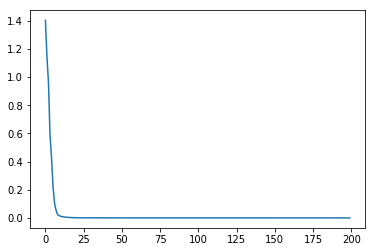

In [14]:
plt.plot(losses)

In [27]:
preds[199].shape

(14, 16, 16)

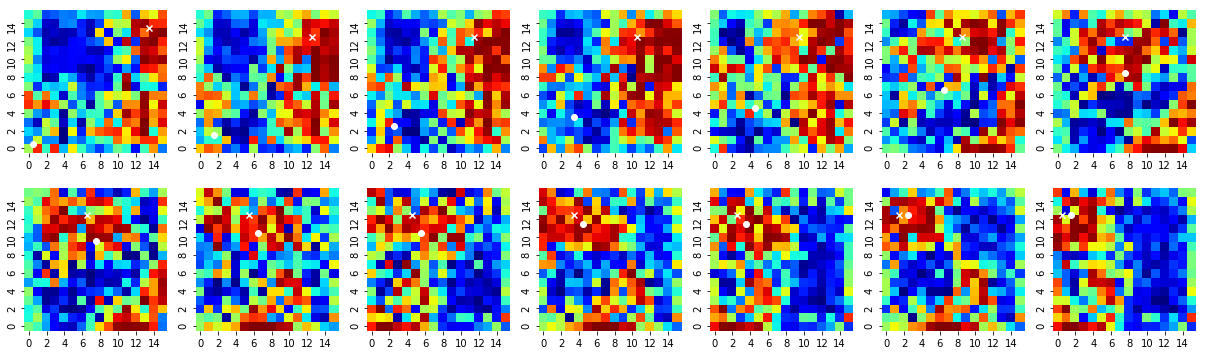

In [16]:
fig, ax = plt.subplots(2, 7, figsize=(21, 6))

x = np.zeros(7, dtype=np.int32).tolist() + np.ones(7, dtype=np.int32).tolist()
y = np.arange(7, dtype=np.int32).tolist() + np.arange(7, dtype=np.int32).tolist()
for i, (j,k) in enumerate(zip(x, y)):
    axes= sns.heatmap(preds[0][i].T, square=True, ax=ax[j, k], cbar=False, cmap='jet')
    ax[j, k].scatter(my_pos[i][0], my_pos[i][1], color='white')
    ax[j, k].scatter(enemy_pos[i][0], enemy_pos[i][1], color='white', marker='x')
    axes.invert_yaxis()

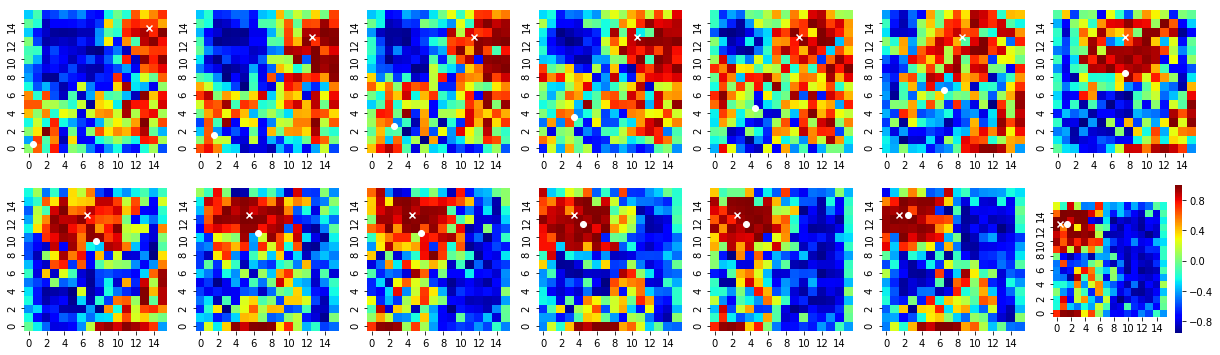

In [17]:
fig, ax = plt.subplots(2, 7, figsize=(21,6))

x = np.zeros(7, dtype=np.int32).tolist() + np.ones(7, dtype=np.int32).tolist()
y = np.arange(7, dtype=np.int32).tolist() + np.arange(7, dtype=np.int32).tolist()
for i, (j,k) in enumerate(zip(x, y)):
    if i == 13:
        axes= sns.heatmap(preds[99][i].T, square=True, ax=ax[j, k], cbar=True, cmap='jet')
    else:
        axes= sns.heatmap(preds[99][i].T, square=True, ax=ax[j, k], cbar=False, cmap='jet')
    ax[j, k].scatter(my_pos[i][0], my_pos[i][1], color='white')
    ax[j, k].scatter(enemy_pos[i][0], enemy_pos[i][1], color='white', marker='x')
    axes.invert_yaxis()

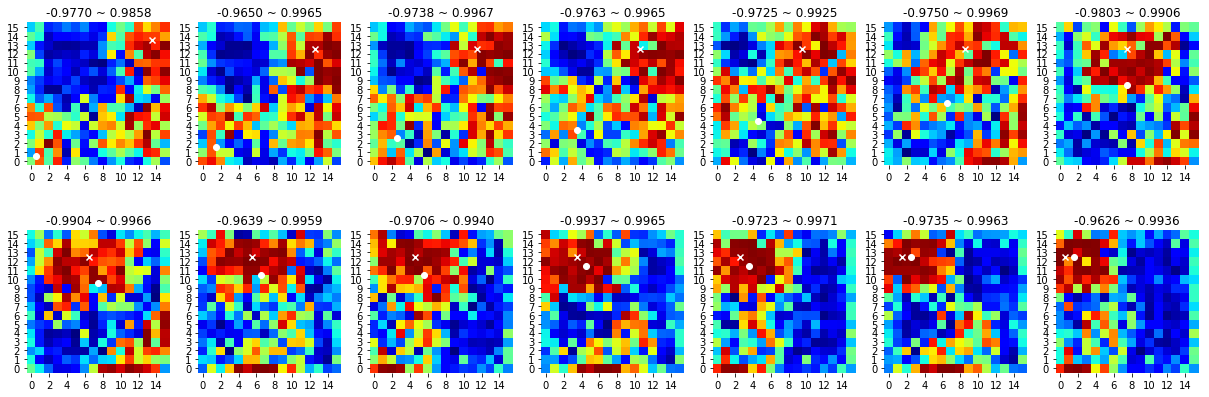

In [32]:
fig, ax = plt.subplots(2, 7, figsize=(21,7))

x = np.zeros(7, dtype=np.int32).tolist() + np.ones(7, dtype=np.int32).tolist()
y = np.arange(7, dtype=np.int32).tolist() + np.arange(7, dtype=np.int32).tolist()
for i, (j,k) in enumerate(zip(x, y)):
    axes= sns.heatmap(preds[199][i].T, square=True, ax=ax[j, k], cbar=False, cmap='jet')
    ax[j, k].scatter(my_pos[i][0], my_pos[i][1], color='white')
    ax[j, k].scatter(enemy_pos[i][0], enemy_pos[i][1], color='white', marker='x')
    axes.invert_yaxis()
    ymin = preds[199].min(1).min(1)[i]
    ymax = preds[199].max(1).max(1)[i]
    ax[j, k].set_title('{:.4f} ~ {:.4f}'.format(ymin, ymax))

In [ ]:
fig, ax = plt.subplots(2, 7, figsize=(21,6))

x = np.zeros(7, dtype=np.int32).tolist() + np.ones(7, dtype=np.int32).tolist()
y = np.arange(7, dtype=np.int32).tolist() + np.arange(7, dtype=np.int32).tolist()
for i, (j,k) in enumerate(zip(x, y)):
    axes= sns.heatmap(preds[499][i].T, square=True, ax=ax[j, k], cbar=False, cmap='jet')
    ax[j, k].scatter(my_pos[i][0], my_pos[i][1], color='white')
    ax[j, k].scatter(enemy_pos[i][0], enemy_pos[i][1], color='white', marker='x')
    axes.invert_yaxis()

In [ ]:
fig, ax = plt.subplots(2, 7, figsize=(21,6))

x = np.zeros(7, dtype=np.int32).tolist() + np.ones(7, dtype=np.int32).tolist()
y = np.arange(7, dtype=np.int32).tolist() + np.arange(7, dtype=np.int32).tolist()
for i, (j,k) in enumerate(zip(x, y)):
    axes= sns.heatmap(preds[999][i].T, square=True, ax=ax[j, k], cbar=False, cmap='jet')
    ax[j, k].scatter(my_pos[i][0], my_pos[i][1], color='white')
    ax[j, k].scatter(enemy_pos[i][0], enemy_pos[i][1], color='white', marker='x')
    axes.invert_yaxis()

In [ ]:
preds[999][-1].max()